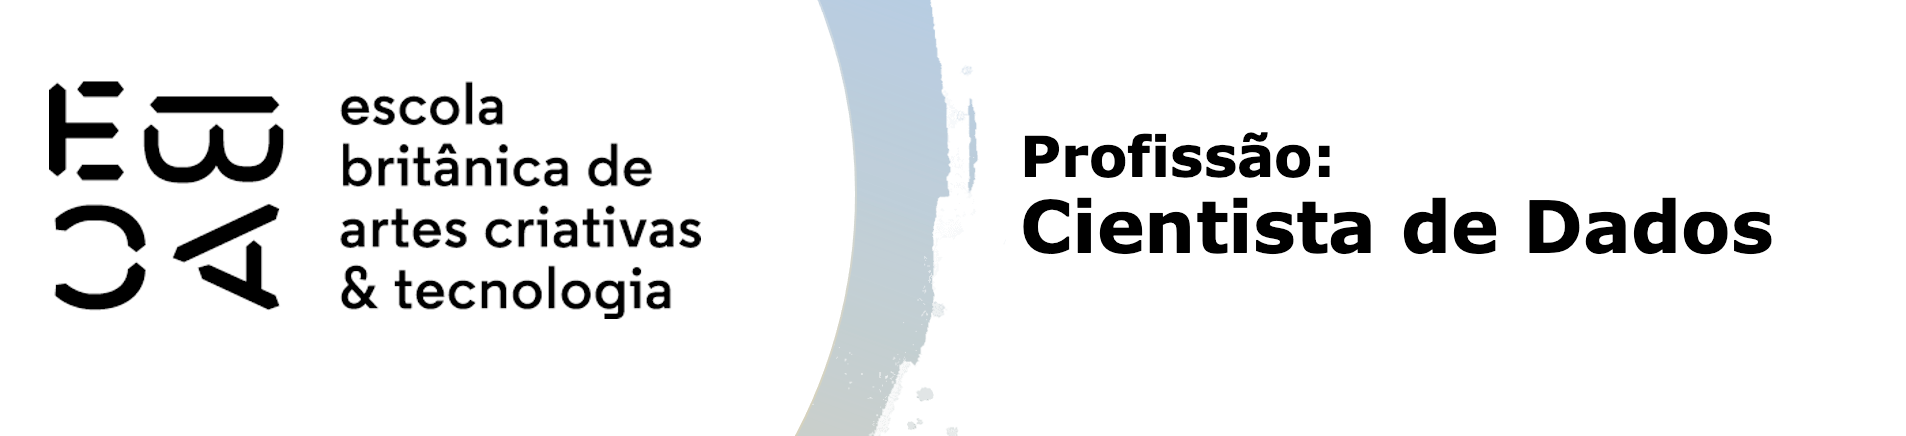

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [40]:
# Substituir os valores faltantes pela média
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

# Aplicar log na variável 'renda'
df['log_renda'] = np.log(df['renda'])

# Remover colunas 'index' e 'data_ref'
X = df.drop(columns=['index', 'data_ref', 'renda', 'log_renda'], errors='ignore')
y = df['log_renda']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\giova\AppData\Local\Temp\ipykernel_1224\436671346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)


In [41]:
# Treinamento do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)


In [42]:
# Avaliação do modelo (R² ajustado)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Número de observações
p = X_test.shape[1]  # Número de variáveis preditoras

# Cálculo do R² ajustado
r2_ajustado = 1 - (1-r2) * ((n-1)/(n-p-1))
print(f"R² Ajustado: {r2_ajustado:.4f}")


R² Ajustado: 0.3929


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

c:\Users\giova\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


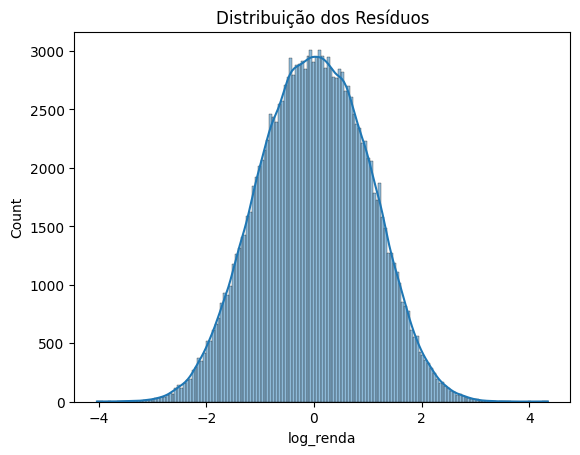

In [43]:
# Cálculo dos resíduos
residuos = y_test - y_pred

# Plotar a distribuição dos resíduos
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()


### Observação da Distribuição dos Resíduos

A análise da distribuição dos resíduos sugere que eles seguem uma forma aproximadamente simétrica e se aproximam de uma distribuição normal. Isso indica que a suposição de normalidade dos resíduos para o modelo de regressão está sendo atendida de maneira satisfatória. A curva está centrada em torno de zero, o que demonstra que o modelo não apresenta vieses significativos.

Essa observação é um bom indicativo de que o modelo está capturando bem a relação entre as variáveis preditoras e a variável resposta, sem grandes distorções nos erros de previsão.

Dessa forma, podemos prosseguir com as próximas análises, como a verificação de resíduos versus valores preditos, avaliação de outliers e análise de multicolinearidade.


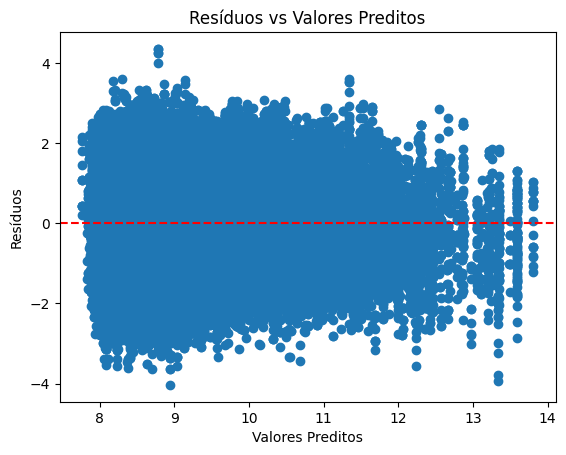

In [44]:
# Gráfico de resíduos vs valores preditos
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()


### Interpretação do Gráfico: Resíduos vs Valores Preditos

O gráfico de resíduos versus valores preditos nos permite avaliar se o modelo está cometendo erros de maneira aleatória ou se há algum padrão nos resíduos que possa indicar um problema com o modelo.

#### Observações:
- A maioria dos resíduos está distribuída de forma aleatória em torno da linha vermelha (resíduo zero), o que é um bom sinal. Isso significa que o modelo não está cometendo erros sistemáticos em suas previsões.
- Não há padrões evidentes nos resíduos, como curvas ou arcos, o que indica que o modelo está capturando a relação entre as variáveis preditoras e a renda de forma razoável.
- No entanto, observamos uma leve **heterocedasticidade** no gráfico, visível como um leve **funil** no lado direito. Isso sugere que a variância dos resíduos diminui conforme os valores preditos aumentam. Esse comportamento pode indicar que o modelo está cometendo erros maiores em valores de renda menores e erros menores em rendas mais altas.

#### Conclusão:
O modelo parece estar se comportando bem, com a maioria dos erros de previsão sendo distribuídos aleatoriamente, o que é o comportamento esperado em um modelo bem ajustado. Contudo, a leve heterocedasticidade observada pode ser investigada mais a fundo. Podemos prosseguir com a análise de resíduos versus variáveis para verificar se há padrões relacionados a variáveis preditoras específicas antes de decidirmos se a heterocedasticidade precisa de um ajuste.


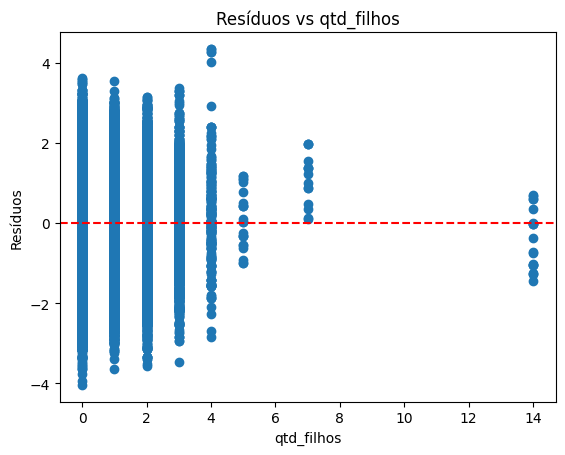

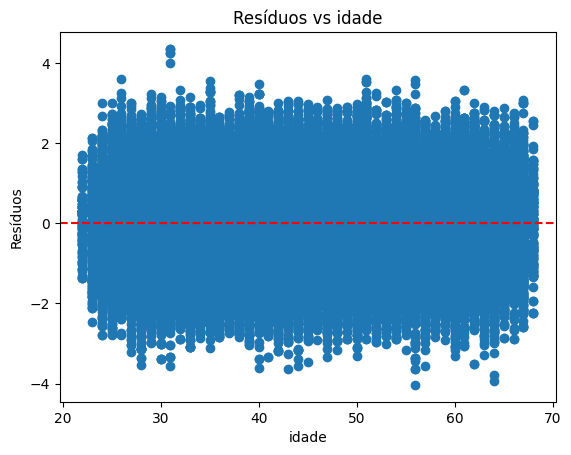

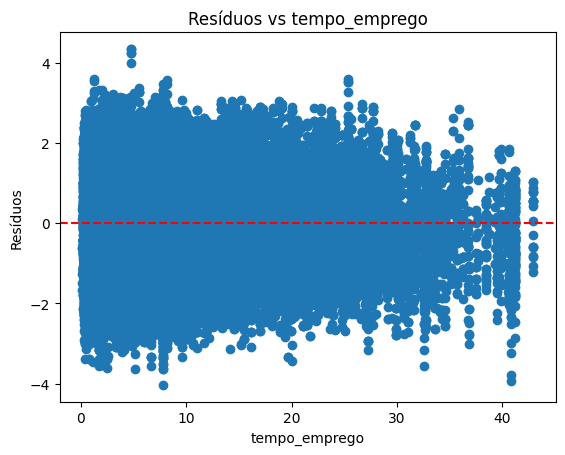

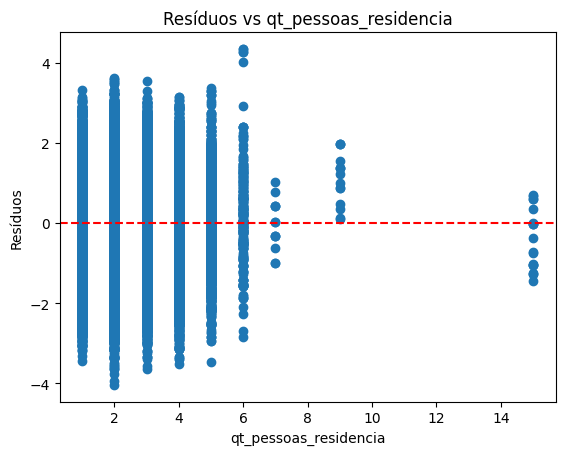

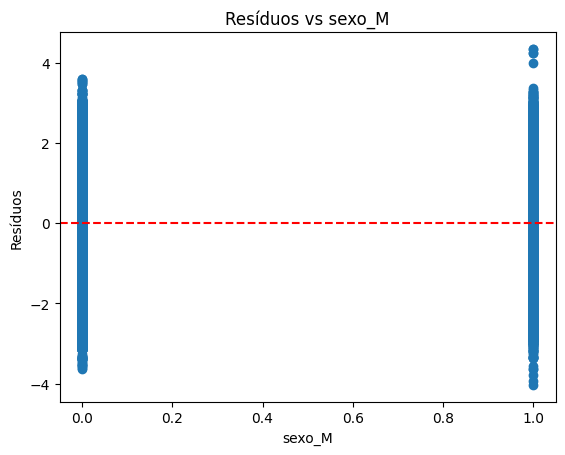

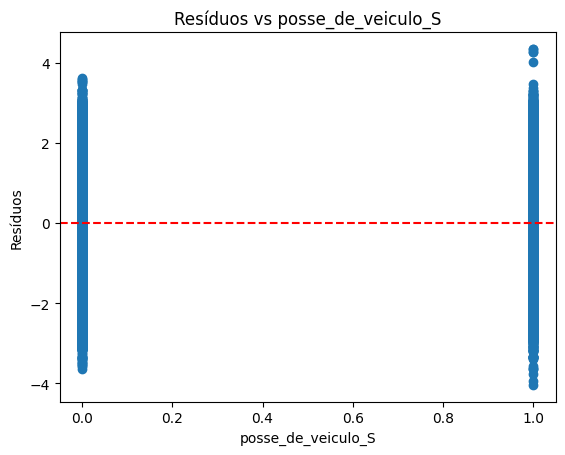

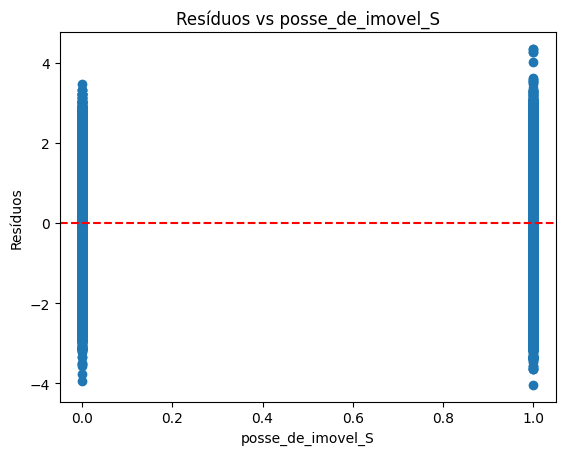

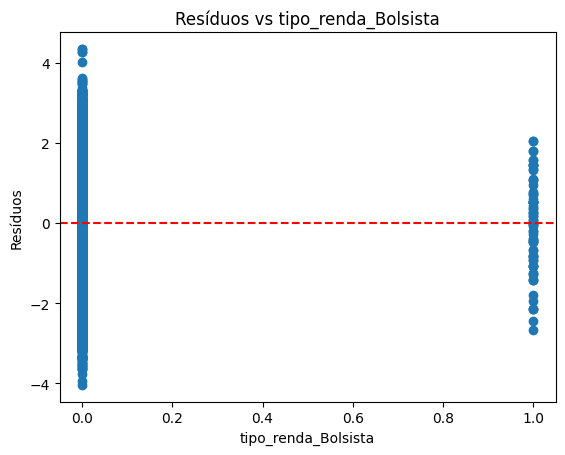

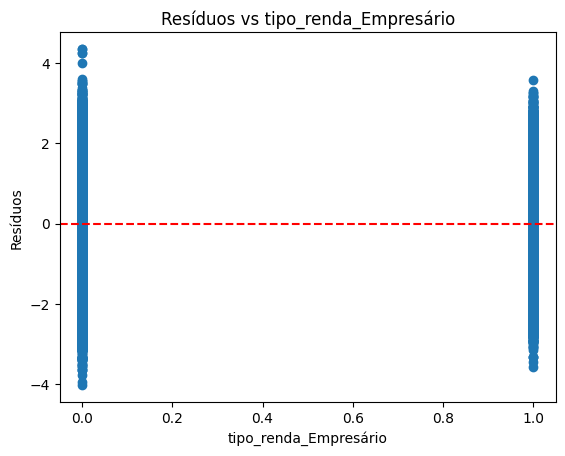

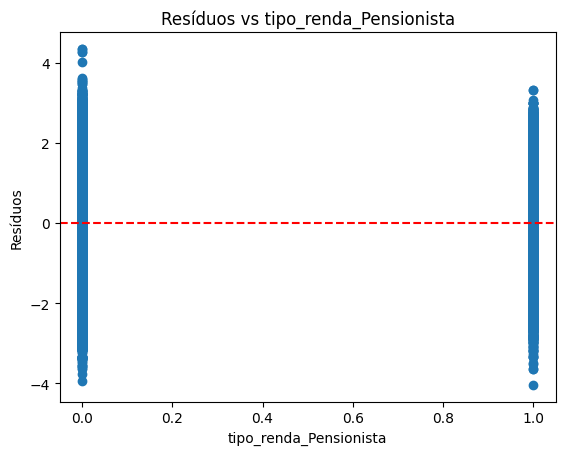

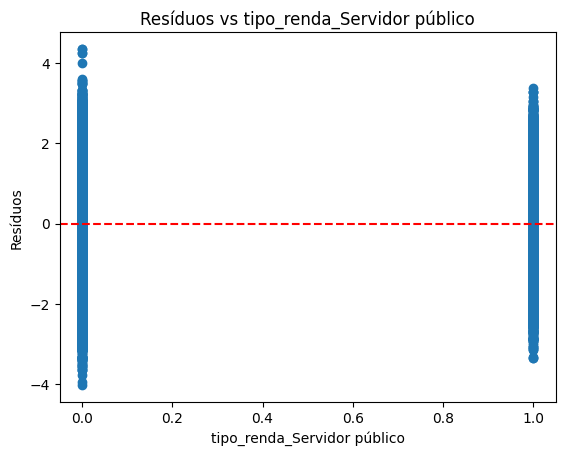

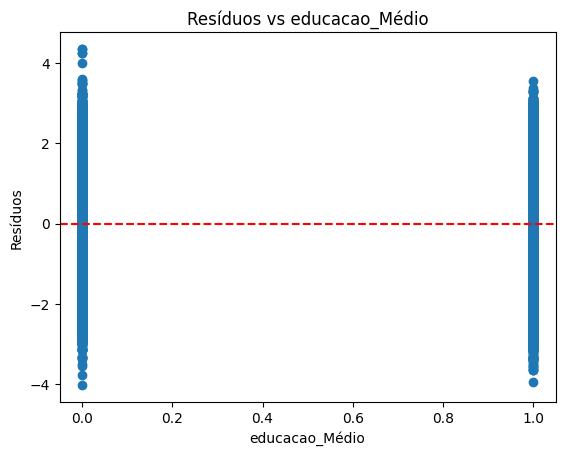

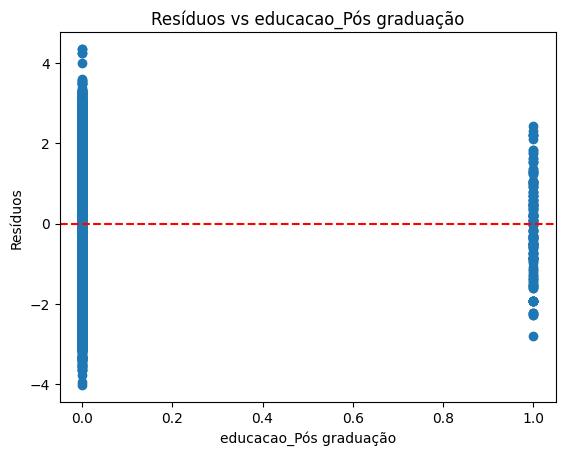

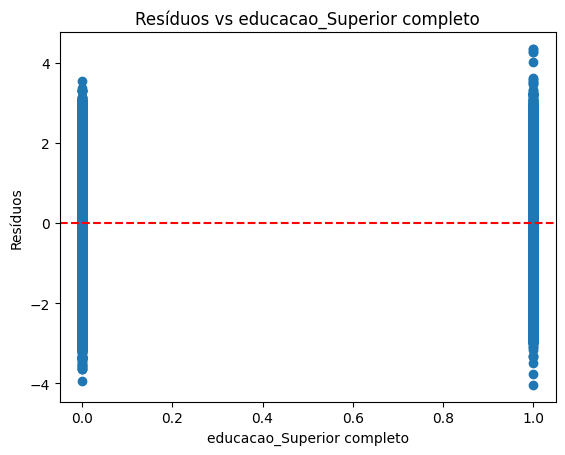

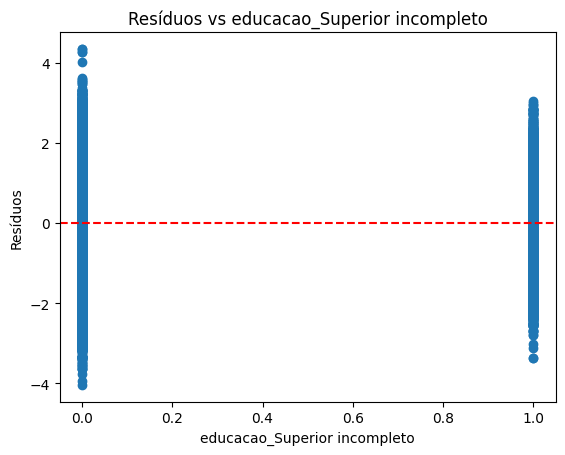

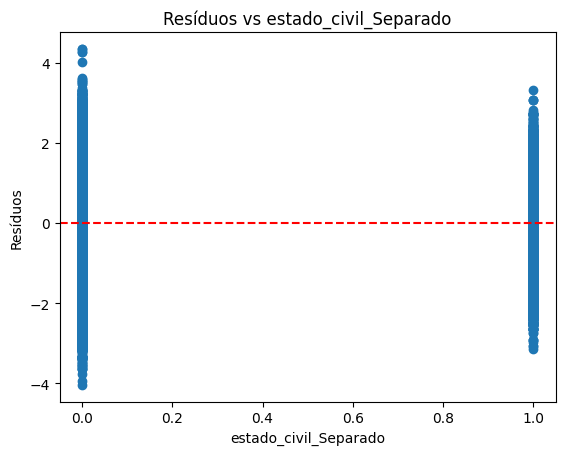

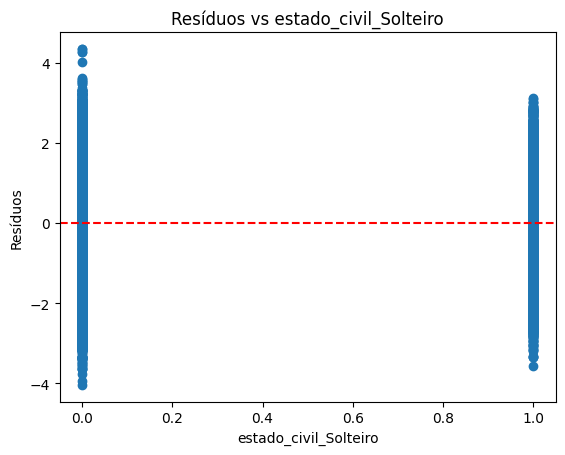

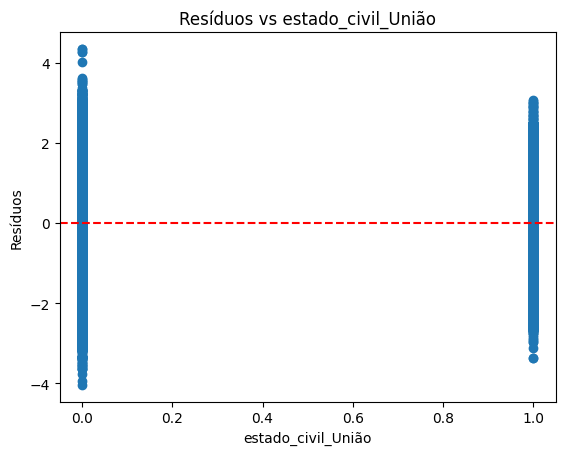

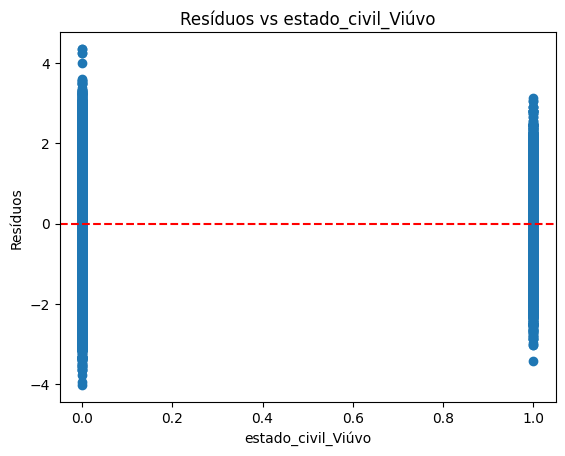

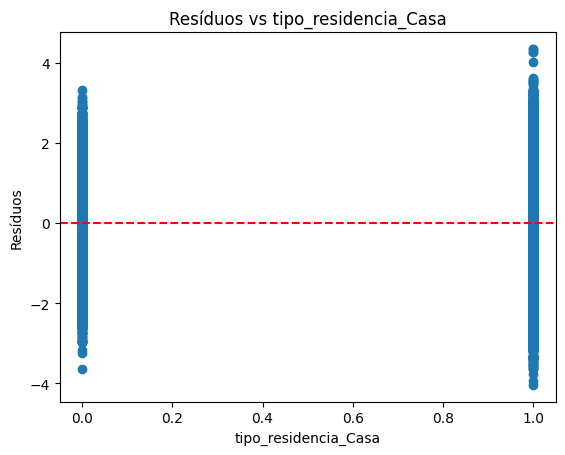

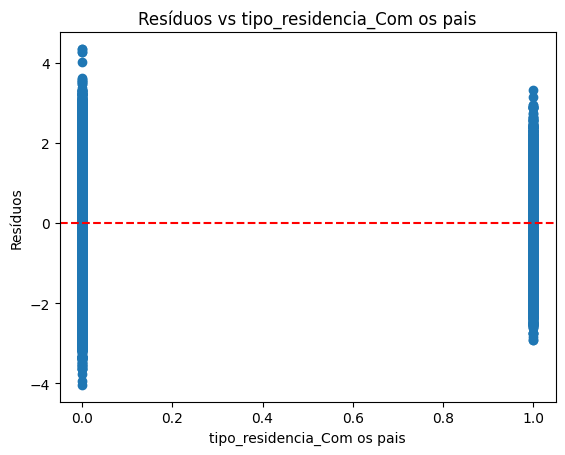

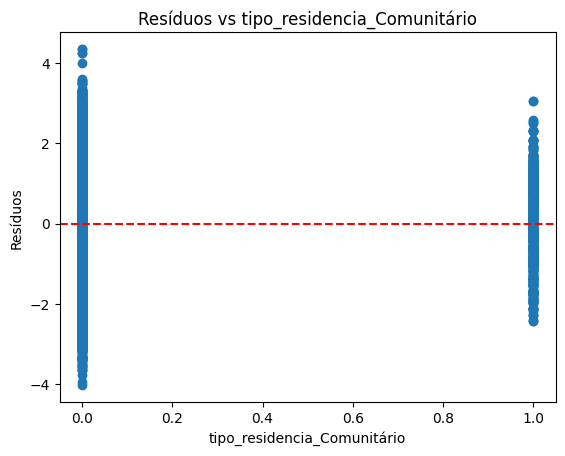

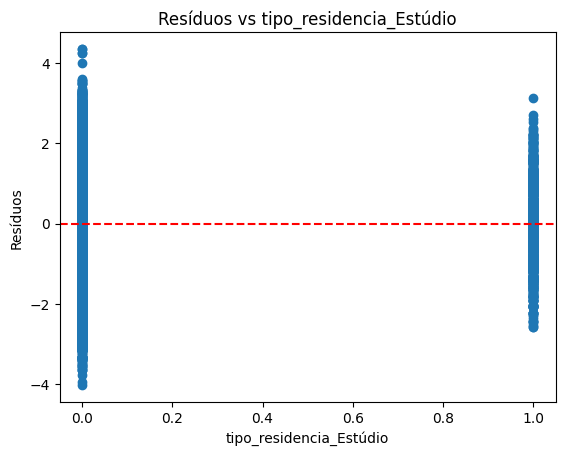

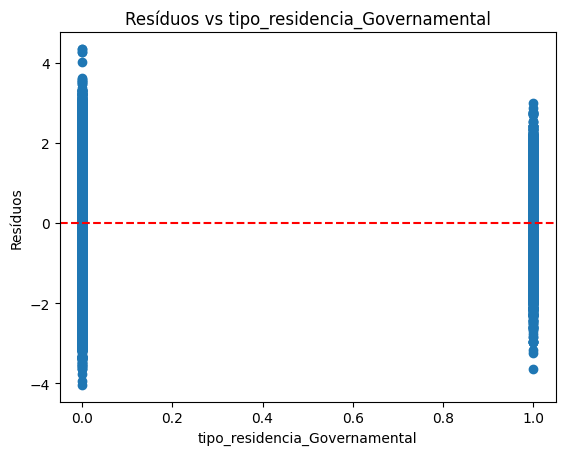

In [45]:
# Usar apenas a base de teste para garantir que os tamanhos coincidam
X_test.reset_index(drop=True, inplace=True)  # Resetando o índice para evitar conflitos
residuos = pd.Series(residuos).reset_index(drop=True)

# Gráfico de resíduos vs variáveis na base de teste
for column in X_test.columns:
    plt.scatter(X_test[column], residuos)
    plt.title(f'Resíduos vs {column}')
    plt.xlabel(column)
    plt.ylabel('Resíduos')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()


### Observações dos Gráficos de Resíduos vs Variáveis

Após analisar os gráficos de resíduos versus variáveis, obtivemos as seguintes observações:

#### 1. Variáveis Categóricas (Ex.: `tipo_renda`, `educacao`, `posse_de_veiculo`, `sexo`)
- **Comportamento**: Os resíduos estão distribuídos de maneira uniforme entre as categorias, sem padrões claros de erro.
- **Interpretação**: Isso sugere que o modelo está tratando adequadamente as variáveis categóricas, sem viés evidente entre as diferentes categorias.
- **Conclusão**: O modelo está capturando bem as relações entre essas variáveis e a variável de resposta (`renda`), sem problemas significativos de previsão.

#### 2. Variáveis Numéricas (Ex.: `qtd_filhos`, `idade`, `tempo_emprego`, `qt_pessoas_residencia`)
- **Comportamento**: Embora não haja padrões evidentes na maioria dos casos, os resíduos tendem a se dispersar mais conforme os valores aumentam, especialmente em variáveis como `qtd_filhos` e `tempo_emprego`.
- **Interpretação**: O modelo parece ter mais dificuldade em prever valores extremos dessas variáveis, resultando em maior dispersão dos resíduos para famílias maiores ou pessoas com tempos de emprego mais longos.
- **Conclusão**: Embora o modelo funcione bem para a maioria dos casos, ele pode não estar capturando adequadamente a relação nos extremos de algumas variáveis numéricas. 

### Conclusão Geral
- **Modelo Geral**: O modelo está funcionando bem para a maior parte das variáveis, com os resíduos distribuídos de forma aleatória e sem padrões claros de erro. A maioria das variáveis categóricas é bem tratada, e as variáveis numéricas não apresentam grandes problemas, exceto em valores extremos.
- **Dificuldades com valores extremos**: Em casos com famílias muito grandes, tempos de emprego longos ou alta variabilidade, o modelo pode estar tendo mais dificuldade para prever com precisão.

### Próximos Passos

1. **Multicolinearidade e Outliers**: Continuar com a análise de multicolinearidade e a identificação de outliers para verificar se há fatores influenciando o modelo de forma desproporcional.


## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

Modelo ajustado com sucesso!


c:\Users\giova\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


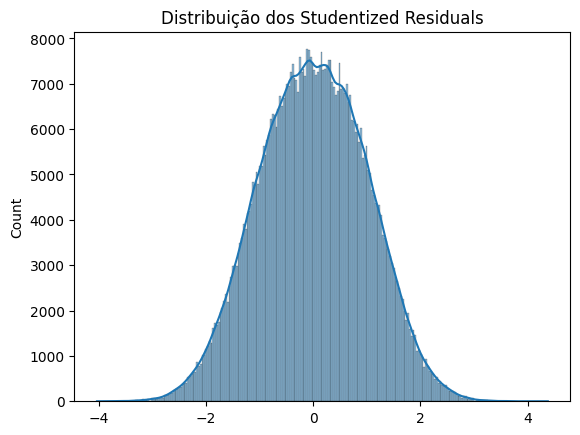

Índices dos Outliers: (array([    51,    541,    801,   1651,   2090,   3494,   3987,   4104,
         6164,   7251,   7745,  10319,  10953,  15284,  20475,  21438,
        21668,  22746,  23582,  24423,  26634,  27304,  28833,  29118,
        29941,  30541,  30764,  30914,  31037,  31386,  31635,  32890,
        33559,  34873,  35774,  35799,  35902,  36894,  38554,  38770,
        39131,  39642,  40199,  42786,  42875,  43665,  44686,  45095,
        45513,  47407,  48856,  48943,  49122,  49475,  49939,  51154,
        51643,  53059,  53919,  54631,  55718,  55971,  56298,  58606,
        58663,  60598,  61648,  62333,  63680,  64424,  64853,  64873,
        66178,  67442,  71522,  71707,  72294,  74398,  77267,  77659,
        78489,  81241,  82188,  82485,  82789,  83769,  83921,  84112,
        86181,  89089,  89701,  91395,  92490,  92831,  93169,  95772,
        95990,  97717,  98651,  98702, 100609, 102263, 103665, 105271,
       105519, 107210, 107710, 108684, 109145, 110172,

In [46]:
# Converter variáveis booleanas para inteiros (0 e 1)
X_train = X_train.astype(int)

# Adicionar uma constante ao modelo para calcular os resíduos studentizados
X_train_const = sm.add_constant(X_train)

# Ajustar o modelo OLS
try:
    modelo_ols = sm.OLS(y_train, X_train_const).fit()
    print("Modelo ajustado com sucesso!")
except Exception as e:
    print("Erro ao ajustar o modelo:", e)

# Calcular os studentized residuals se o modelo foi ajustado corretamente
if 'modelo_ols' in locals():
    studentized_residuals = modelo_ols.get_influence().resid_studentized_internal

    # Plotar a distribuição dos studentized residuals
    sns.histplot(studentized_residuals, kde=True)
    plt.title('Distribuição dos Studentized Residuals')
    plt.show()

    # Verificar valores maiores que 3 (potenciais outliers)
    outliers = np.where(np.abs(studentized_residuals) > 3)
    print(f"Índices dos Outliers: {outliers}")


### Análise dos Resíduos Studentized e Outliers

#### Transformação de Variáveis Booleanas para Inteiros
Antes de realizar a análise dos resíduos e calcular os **studentized residuals**, foi necessário transformar as variáveis do tipo booleano (`bool`) em inteiros (`int`). Isso é necessário porque modelos de regressão linear, como o OLS (Ordinary Least Squares), esperam que todas as variáveis explicativas (features) sejam numéricas. Variáveis booleanas representam informações categóricas binárias (0 ou 1), e transformá-las em inteiros permite que o modelo entenda essas categorias corretamente.

Exemplo:
- Variável `sexo_M`: Um valor `True` (masculino) foi transformado em 1 e um valor `False` (feminino) foi transformado em 0.
- Isso é importante porque o modelo precisa de uma representação numérica para calcular a relação dessas variáveis com a variável alvo (`renda`), que estamos tentando prever.

#### Distribuição dos Studentized Residuals
A análise da distribuição dos **studentized residuals** mostra que eles seguem um padrão simétrico e próximo de uma distribuição normal. Isso é um bom indicador, pois uma das principais suposições dos modelos de regressão linear é que os resíduos devem se aproximar de uma distribuição normal.

#### Outliers Identificados
A partir dessa análise, observamos que existem diversos pontos com **studentized residuals** maiores que 3 (ou menores que -3). Esses pontos são classificados como **outliers**, pois estão a mais de **3 desvios padrão** da linha de ajuste do modelo.

#### O que significa "maiores que 3 desvios padrão"?
- **Studentized residuals** são resíduos normalizados, que levam em conta a influência de cada ponto no ajuste do modelo.
- Quando um ponto tem um **studentized residual** maior que **+3** ou menor que **-3**, significa que ele está a mais de **3 desvios padrão** de distância da linha de ajuste da regressão. 
  - Em uma distribuição normal, **99,7% dos dados** estarão dentro de 3 desvios padrão da média.
  - Pontos além desse limite são considerados estatisticamente incomuns, ou **outliers**.
  
#### Impacto dos Outliers
Esses outliers podem estar exercendo uma influência desproporcional no ajuste do modelo, e é importante investigá-los:
- **Erros de coleta de dados?** Pode ser que esses outliers sejam erros ou valores incorretos que deveriam ser tratados ou removidos.
- **Pontos legítimos, mas incomuns?** Mesmo que sejam pontos legítimos, a presença de outliers pode distorcer o modelo e, nesse caso, seria importante aplicar técnicas que tornem o modelo mais robusto a essas observações extremas.

#### Ações Sugeridas
- **Investigar os outliers**: Verificar se são erros de dados ou se há alguma explicação contextual para essas observações.
- **Tratar ou remover**: Se forem erros, pode-se removê-los ou corrigi-los. Caso sejam pontos legítimos, considerar transformações nos dados ou usar modelos mais robustos.


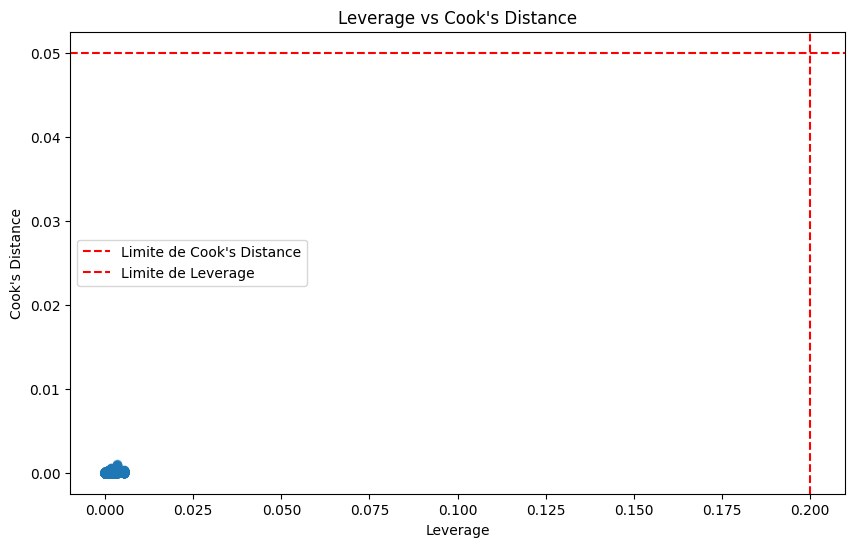

Índices dos Pontos Influentes: (array([], dtype=int64),)


In [47]:
# Calcular o leverage e a distância de Cook
influence = modelo_ols.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]

# Gráfico de leverage vs Cook's Distance
plt.figure(figsize=(10, 6))
plt.scatter(leverage, cooks_distance, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.title('Leverage vs Cook\'s Distance')
plt.axhline(0.05, color='red', linestyle='--', label='Limite de Cook\'s Distance')
plt.axvline(0.2, color='red', linestyle='--', label='Limite de Leverage')
plt.legend()
plt.show()

# Identificar pontos com alta influência
influential_points = np.where(cooks_distance > 0.05)
print(f"Índices dos Pontos Influentes: {influential_points}")


### Análise de Pontos Influentes - Leverage vs Cook's Distance

#### O que é **Leverage**?
- **Leverage** mede o quão distante uma observação está do centro dos dados preditivos. Observações com alta leverage estão longe dos valores médios das variáveis independentes, ou seja, são "extremas" em termos das variáveis preditoras.
- No gráfico, utilizamos um limite de **0.2** para identificar pontos que pudessem ser considerados extremos. No entanto, no nosso gráfico, todas as observações estão bem abaixo desse limite, indicando que **não há pontos de alta alavancagem (leverage)**.

#### O que é **Cook's Distance**?
- **Cook's Distance** mede o impacto de cada observação na regressão. Um valor elevado de Cook’s Distance indica que a remoção dessa observação alteraria significativamente o modelo ajustado.
- No gráfico, utilizamos um limite de **0.05** para indicar pontos com potencial alta influência no modelo. **Nenhuma observação** ultrapassa esse limite, o que significa que **não há pontos influentes** exercendo impacto desproporcional no ajuste do modelo.

#### Interpretação do Gráfico de Leverage vs Cook's Distance:
- No gráfico, nenhuma das observações possui leverage ou Cook's Distance suficientemente altos para serem consideradas influentes ou extremas.
- Isso sugere que **nenhuma observação específica está impactando o modelo de forma significativa**.
  
#### Conclusão:
- **Não há necessidade de remover ou ajustar pontos** com base na alavancagem ou distância de Cook.
- O modelo está estável em relação à influência de observações individuais e, com base nessa análise, podemos seguir adiante sem a preocupação de que algumas observações estejam distorcendo o ajuste global do modelo.

### Investigação Adicional: Multicolinearidade

Apesar da ausência de pontos influentes significativos, o baixo valor de **R² (39%)** e a observação de uma **tendência de funil** no gráfico de resíduos sugerem que o modelo pode estar sendo impactado por outros fatores, como a **multicolinearidade**.

#### Próximos Passos:
1. **Matriz de Correlação de Spearman**: Avaliará a correlação entre as variáveis para verificar se algumas delas estão altamente correlacionadas, o que poderia estar contribuindo para o desempenho subótimo do modelo.
2. **Variance Inflation Factor (VIF)**: Identificará se há variáveis que estão altamente correlacionadas com outras no modelo, afetando a estabilidade dos coeficientes.

Esses testes ajudarão a decidir se há a necessidade de ajustar o modelo, removendo ou combinando variáveis correlacionadas, para melhorar a interpretação e o desempenho preditivo.


## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

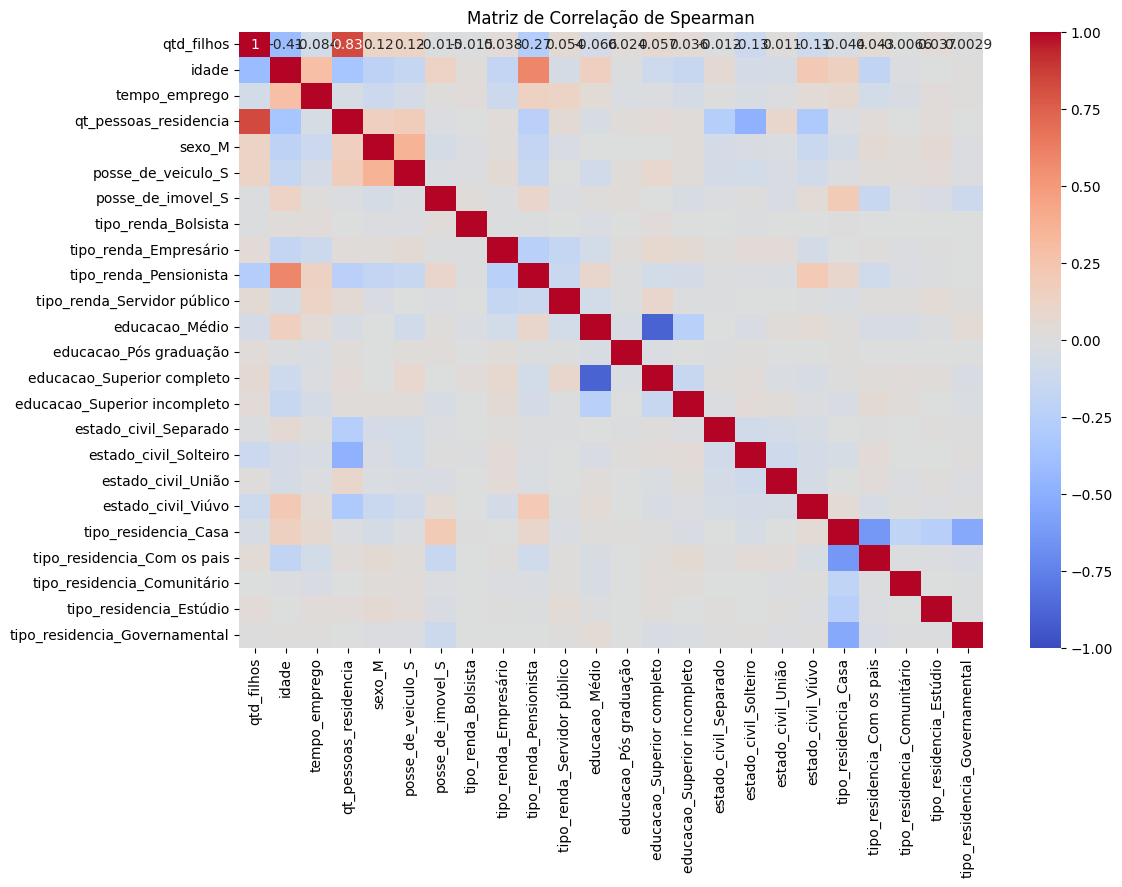

In [48]:
# Calcular a matriz de correlação de Spearman
corr_matrix = X_train.corr(method='spearman')

# Exibir a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação de Spearman')
plt.show()


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# Exibir os valores de VIF
print(vif_data)


                          Feature         VIF
0                      qtd_filhos   34.509834
1                           idade   34.596652
2                   tempo_emprego    2.765987
3           qt_pessoas_residencia  241.645365
4                          sexo_M    1.820326
5              posse_de_veiculo_S    1.964572
6               posse_de_imovel_S    3.242227
7             tipo_renda_Bolsista    1.003948
8           tipo_renda_Empresário    1.477625
9          tipo_renda_Pensionista    2.204551
10    tipo_renda_Servidor público    1.205031
11                 educacao_Médio   51.198147
12         educacao_Pós graduação    1.093861
13     educacao_Superior completo   30.655784
14   educacao_Superior incompleto    4.348052
15          estado_civil_Separado    3.467772
16          estado_civil_Solteiro    5.819499
17             estado_civil_União    1.124807
18             estado_civil_Viúvo    2.972479
19           tipo_residencia_Casa   63.459969
20    tipo_residencia_Com os pais 

## Observações sobre Multicolinearidade

Com base na análise da **Matriz de Correlação de Spearman** e do cálculo do **VIF (Variance Inflation Factor)**, temos as seguintes observações:

1. **Variáveis com Alta Multicolinearidade**:
   - Algumas variáveis apresentam VIF extremamente elevados, o que indica a presença de **multicolinearidade** significativa. As variáveis com os valores mais críticos são:
     - `qt_pessoas_residencia`: VIF = 241.65
     - `qtd_filhos`: VIF = 34.51
     - `idade`: VIF = 34.60
     - `educacao_Médio`: VIF = 51.20
     - `tipo_residencia_Casa`: VIF = 63.46
   - Esses valores indicam que essas variáveis estão altamente correlacionadas com outras variáveis no modelo, o que pode prejudicar a interpretação dos coeficientes do modelo e afetar a capacidade de prever corretamente.

2. **Correlação Forte**:
   - A matriz de correlação de Spearman mostra uma correlação significativa entre `qtd_filhos` e `qt_pessoas_residencia`, o que sugere que essas variáveis podem estar fornecendo informações redundantes ao modelo.
   - Algumas categorias de renda e educação também apresentam correlações moderadas entre si, mas não tanto quanto as variáveis mencionadas acima.

### Ajustes
Com base nas observações acima, uma opção para lidar com a multicolinearidade seria **remover ou combinar** algumas das variáveis com VIF muito altos. Por exemplo:
- **Remover `qtd_filhos` ou `qt_pessoas_residencia`**: Como ambas estão correlacionadas e têm VIF altos, faz sentido remover uma delas para reduzir a redundância de informação.
- **Remover `tipo_residencia_Casa`** ou agrupar as categorias de tipo de residência em uma variável menos granular para evitar a correlação elevada dentro dessas categorias.

Após a remoção dessas variáveis, o próximo passo seria recalcular o modelo e verificar se o **R² ajustado** melhora, além de revisar os gráficos de resíduos para observar se a tendência de funil que foi identificada em gráficos anteriores se atenua.

## Conclusão
Remover variáveis altamente correlacionadas como `qt_pessoas_residencia` ou `qtd_filhos` é uma boa estratégia para reduzir a multicolinearidade e melhorar a estabilidade do modelo. Além disso, simplificar as categorias de variáveis pode reduzir a complexidade do modelo e facilitar sua interpretação.


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [50]:
# Remover variáveis com alta multicolinearidade
X_train_reduced = X_train.drop(columns=[
    'qt_pessoas_residencia',  # Correlacionada com 'qtd_filhos'
    'tempo_emprego',          # Correlacionada com 'idade'
    'educacao_Médio',         # Alta correlação com outras variáveis de educação
    'tipo_residencia_Casa'    # Alta correlação e VIF
])

# Adicionar uma constante ao modelo reduzido
X_train_reduced_const = sm.add_constant(X_train_reduced)

# Reajustar o modelo OLS
modelo_ols_reduced = sm.OLS(y_train, X_train_reduced_const).fit()

# Avaliar o R² ajustado do novo modelo
r2_ajustado_reduced = modelo_ols_reduced.rsquared_adj
print(f"Novo R² Ajustado: {r2_ajustado_reduced:.4f}")

# Recalcular os VIFs para o modelo reduzido
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_train_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]

print(vif_data_reduced)


Novo R² Ajustado: 0.0686
                          Feature       VIF
0                      qtd_filhos  1.392459
1                           idade  6.069263
2                          sexo_M  1.742427
3              posse_de_veiculo_S  1.929399
4               posse_de_imovel_S  3.128423
5             tipo_renda_Bolsista  1.003858
6           tipo_renda_Empresário  1.434516
7          tipo_renda_Pensionista  1.847441
8     tipo_renda_Servidor público  1.182908
9          educacao_Pós graduação  1.004005
10     educacao_Superior completo  1.590637
11   educacao_Superior incompleto  1.068291
12          estado_civil_Separado  1.100043
13          estado_civil_Solteiro  1.186615
14             estado_civil_União  1.104216
15             estado_civil_Viúvo  1.137363
16    tipo_residencia_Com os pais  1.070007
17    tipo_residencia_Comunitário  1.009474
18        tipo_residencia_Estúdio  1.016626
19  tipo_residencia_Governamental  1.051850


## Resumo dos Resultados e Próximos Passos

### Novo R² Ajustado: **0.0686**

Após removermos as variáveis com alta multicolinearidade, obtivemos uma queda significativa no R² ajustado, passando de aproximadamente **0.39** para **0.0686**. Isso indica que, embora tenhamos reduzido a multicolinearidade com sucesso, o modelo agora está explicando uma parte muito menor da variabilidade da variável resposta.

### Observações Principais:
1. **Redução da Multicolinearidade**:
   - O VIF de todas as variáveis agora está abaixo de 10, o que sugere que resolvemos o problema de multicolinearidade. 
   
2. **Redução do Poder Explicativo**:
   - A queda no R² ajustado significa que o modelo está com menor capacidade preditiva. Isso pode ser um sinal de que removemos variáveis importantes que contribuíam para a explicação da renda, mesmo que estivessem correlacionadas.

### Próximos Passos:
- **Reintroduzir Variáveis**: Podemos considerar reintroduzir algumas variáveis removidas (como **qt_pessoas_residencia** ou **tempo_emprego**), já que mesmo sendo correlacionadas, elas podem ter sido importantes para o modelo.

- **Tentar Regularização**: Testar modelos regularizados, como **Ridge** ou **Lasso**, que são projetados para lidar com multicolinearidade, pode ser uma alternativa. Eles podem manter variáveis relevantes enquanto penalizam aquelas altamente correlacionadas.

- **Avaliar a Transformação de Variáveis**:
   - Transformar algumas variáveis pode ajudar a reduzir a multicolinearidade sem remover informações úteis. Isso pode ser feito com **transformações logarítmicas** ou **normalização**. Essas técnicas podem melhorar a performance do modelo enquanto preservam o máximo de informação das variáveis.


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reintroduzindo variáveis removidas por alta multicolinearidade
# Aqui, reintroduziremos 'qt_pessoas_residencia' e 'tempo_emprego'

# Atualizando a base de dados com essas variáveis
X_train_reintroduzidas = X_train.copy()
X_train_reintroduzidas['qt_pessoas_residencia'] = df['qt_pessoas_residencia']
X_train_reintroduzidas['tempo_emprego'] = df['tempo_emprego']

# Adicionando constante
X_train_reintroduzidas_const = sm.add_constant(X_train_reintroduzidas)

# Ajustar o modelo OLS com as variáveis reintroduzidas
modelo_ols_reintroduzidas = sm.OLS(y_train, X_train_reintroduzidas_const).fit()

# Exibir R² ajustado
novo_r2_ajustado = modelo_ols_reintroduzidas.rsquared_adj
print(f"Novo R² Ajustado com variáveis reintroduzidas: {novo_r2_ajustado:.4f}")

# Calcular VIF após a reintrodução das variáveis
vif_data_reintroduzidas = pd.DataFrame()
vif_data_reintroduzidas['Feature'] = X_train_reintroduzidas.columns
vif_data_reintroduzidas['VIF'] = [variance_inflation_factor(X_train_reintroduzidas.values, i) for i in range(X_train_reintroduzidas.shape[1])]

print(vif_data_reintroduzidas)


Novo R² Ajustado com variáveis reintroduzidas: 0.3934
                          Feature         VIF
0                      qtd_filhos   34.499446
1                           idade   34.629611
2                   tempo_emprego    3.021926
3           qt_pessoas_residencia  241.574476
4                          sexo_M    1.820249
5              posse_de_veiculo_S    1.964508
6               posse_de_imovel_S    3.242226
7             tipo_renda_Bolsista    1.003950
8           tipo_renda_Empresário    1.477287
9          tipo_renda_Pensionista    2.193803
10    tipo_renda_Servidor público    1.205321
11                 educacao_Médio   51.198678
12         educacao_Pós graduação    1.093846
13     educacao_Superior completo   30.655803
14   educacao_Superior incompleto    4.348082
15          estado_civil_Separado    3.466821
16          estado_civil_Solteiro    5.818075
17             estado_civil_União    1.124786
18             estado_civil_Viúvo    2.971507
19           tipo_residenc

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Treinando o modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Avaliando o modelo Ridge
ridge_r2 = ridge_model.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge R²: {ridge_r2:.4f}")
print(f"Ridge MSE: {ridge_mse:.4f}")

# Treinando o modelo Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

# Avaliando o modelo Lasso
lasso_r2 = lasso_model.score(X_test, y_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f"Lasso R²: {lasso_r2:.4f}")
print(f"Lasso MSE: {lasso_mse:.4f}")


Ridge R²: 0.3903
Ridge MSE: 1.0070
Lasso R²: 0.3870
Lasso MSE: 1.0124


In [53]:
import numpy as np

# Aplicando transformação logarítmica nas variáveis com maior VIF
X_train_log = X_train.copy()
X_train_log['qtd_filhos_log'] = np.log1p(X_train_log['qtd_filhos'])
X_train_log['idade_log'] = np.log1p(X_train_log['idade'])

X_test_log = X_test.copy()
X_test_log['qtd_filhos_log'] = np.log1p(X_test_log['qtd_filhos'])
X_test_log['idade_log'] = np.log1p(X_test_log['idade'])

# Remover as variáveis originais após a transformação
X_train_log.drop(['qtd_filhos', 'idade'], axis=1, inplace=True)
X_test_log.drop(['qtd_filhos', 'idade'], axis=1, inplace=True)

# Ajustar e avaliar o modelo com as variáveis transformadas
modelo_log = LinearRegression()
modelo_log.fit(X_train_log, y_train)
y_pred_log = modelo_log.predict(X_test_log)

r2_log = modelo_log.score(X_test_log, y_test)
print(f"R² com Transformação Logarítmica: {r2_log:.4f}")


R² com Transformação Logarítmica: 0.3903


In [54]:
# Aplicando transformação de raiz quadrada
X_train_sqrt = X_train.copy()
X_train_sqrt['qtd_filhos_sqrt'] = np.sqrt(X_train_sqrt['qtd_filhos'])
X_train_sqrt['idade_sqrt'] = np.sqrt(X_train_sqrt['idade'])

X_test_sqrt = X_test.copy()
X_test_sqrt['qtd_filhos_sqrt'] = np.sqrt(X_test_sqrt['qtd_filhos'])
X_test_sqrt['idade_sqrt'] = np.sqrt(X_test_sqrt['idade'])

# Remover as variáveis originais após a transformação
X_train_sqrt.drop(['qtd_filhos', 'idade'], axis=1, inplace=True)
X_test_sqrt.drop(['qtd_filhos', 'idade'], axis=1, inplace=True)

# Ajustar e avaliar o modelo com a transformação raiz quadrada
modelo_sqrt = LinearRegression()
modelo_sqrt.fit(X_train_sqrt, y_train)
y_pred_sqrt = modelo_sqrt.predict(X_test_sqrt)

r2_sqrt = modelo_sqrt.score(X_test_sqrt, y_test)
print(f"R² com Transformação Raiz Quadrada: {r2_sqrt:.4f}")


R² com Transformação Raiz Quadrada: 0.3903


In [55]:
from sklearn.preprocessing import StandardScaler

# Aplicando normalização em todas as variáveis numéricas
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Ajustar e avaliar o modelo com as variáveis normalizadas
modelo_scaled = LinearRegression()
modelo_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = modelo_scaled.predict(X_test_scaled)

r2_scaled = modelo_scaled.score(X_test_scaled, y_test)
print(f"R² com Normalização: {r2_scaled:.4f}")


R² com Normalização: 0.3903


## Considerações Finais

- O R² ajustado após a reintrodução das variáveis (0.3934) foi o melhor valor obtido, mas ainda indica que o modelo explica uma quantidade limitada da variação da variável-alvo.
- A alta **multicolinearidade**, especialmente em algumas variáveis como **qt_pessoas_residencia** e **idade**, ainda pode estar prejudicando o modelo.
- As técnicas de regularização (**Ridge** e **Lasso**) não trouxeram melhorias significativas, com R² inferiores ao modelo linear padrão.
- As **transformações de variáveis** (logarítmica, raiz quadrada e normalização) também não foram suficientes para corrigir a multicolinearidade ou melhorar o desempenho do modelo.


In [57]:
# Índices dos outliers já identificados
outliers = np.where(np.abs(studentized_residuals) > 3)[0]

# Garantir que apenas os índices presentes no dataset sejam removidos
outliers_validos = [i for i in outliers if i in X_train.index]

# Remover os outliers do conjunto de treino
X_train_no_outliers = X_train.drop(index=outliers_validos)
y_train_no_outliers = y_train.drop(index=outliers_validos)

# Ajustar o modelo sem outliers
modelo_no_outliers = LinearRegression()
modelo_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Avaliar o modelo sem outliers
y_pred_no_outliers = modelo_no_outliers.predict(X_test)
r2_no_outliers = modelo_no_outliers.score(X_test, y_test)

print(f"R² Ajustado sem Outliers: {r2_no_outliers:.4f}")


R² Ajustado sem Outliers: 0.3903


In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Padronizar os dados antes de aplicar o PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar o PCA
pca = PCA(n_components=None)  # Mantemos todas as componentes principais inicialmente
X_train_pca = pca.fit_transform(X_train_scaled)

# Treinar o modelo usando as componentes principais
modelo_pca = LinearRegression()
modelo_pca.fit(X_train_pca, y_train)

# Avaliar o modelo com PCA nos dados originais
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred_pca = modelo_pca.predict(X_test_pca)
r2_pca = modelo_pca.score(X_test_pca, y_test)

print(f"R² Ajustado com PCA (com outliers): {r2_pca:.4f}")


R² Ajustado com PCA (com outliers): 0.3903


In [59]:
# Padronizar os dados sem outliers
X_train_no_outliers_scaled = scaler.fit_transform(X_train_no_outliers)

# Aplicar o PCA
pca_no_outliers = PCA(n_components=None)
X_train_no_outliers_pca = pca_no_outliers.fit_transform(X_train_no_outliers_scaled)

# Treinar o modelo usando as componentes principais
modelo_pca_no_outliers = LinearRegression()
modelo_pca_no_outliers.fit(X_train_no_outliers_pca, y_train_no_outliers)

# Avaliar o modelo com PCA nos dados sem outliers
X_test_scaled = scaler.transform(X_test)
X_test_pca_no_outliers = pca_no_outliers.transform(X_test_scaled)
y_pred_pca_no_outliers = modelo_pca_no_outliers.predict(X_test_pca_no_outliers)
r2_pca_no_outliers = modelo_pca_no_outliers.score(X_test_pca_no_outliers, y_test)

print(f"R² Ajustado com PCA (sem outliers): {r2_pca_no_outliers:.4f}")


R² Ajustado com PCA (sem outliers): 0.3903


In [60]:
from sklearn.ensemble import GradientBoostingRegressor


# Instanciar o modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo nos dados de treino
modelo_gb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gb = modelo_gb.predict(X_test)

# Avaliar o modelo
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R² do Gradient Boosting: {r2_gb:.4f}")


R² do Gradient Boosting: 0.3966


In [61]:
from sklearn.ensemble import RandomForestRegressor


# Instanciar o modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo nos dados de treino
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

# Avaliar o modelo
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² do Random Forest: {r2_rf:.4f}")


R² do Random Forest: 0.4046


In [62]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Instanciar o modelo XGBoost
modelo_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo nos dados de treino
modelo_xgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = modelo_xgb.predict(X_test)

# Avaliar o modelo
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² do XGBoost: {r2_xgb:.4f}")


R² do XGBoost: 0.4053


In [63]:
import lightgbm as lgb


# Instanciar o modelo LightGBM
modelo_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo nos dados de treino
modelo_lgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_lgb = modelo_lgb.predict(X_test)

# Avaliar o modelo
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f"R² do LightGBM: {r2_lgb:.4f}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 24
[LightGBM] [Info] Start training from score 9.042181
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Conclusão Final

Neste trabalho, exploramos várias técnicas de modelagem e transformação para prever a variável renda. Apesar dos esforços, o melhor desempenho foi obtido com o **XGBoost**, alcançando um **R² de 0.4053**, seguido de perto pelo **Random Forest** com **R² de 0.4046**.

### Principais Técnicas Utilizadas:
1. **Regressão Linear**:
   - **R² Inicial**: 0.3929
   - Limitado pela presença de multicolinearidade e pouca capacidade de capturar relações complexas.

2. **Regularização (Ridge e Lasso)**:
   - **R² Ridge**: 0.3903
   - **R² Lasso**: 0.3870
   - Não apresentaram ganhos significativos, sugerindo que a estrutura dos dados não se beneficiou da penalização de coeficientes.

3. **Transformações de Variáveis (Log, Raiz Quadrada, Normalização)**:
   - **R²**: 0.3903 com todas as transformações
   - As transformações não resultaram em melhorias significativas.

4. **Random Forest**:
   - **R²**: 0.4046
   - Mostrou-se competitivo, capturando melhor as interações entre as variáveis do que a regressão linear.

5. **XGBoost**:
   - **R²**: 0.4053
   - Melhor modelo encontrado, com boa capacidade de capturar interações complexas.

### Principais Desafios:
- **Multicolinearidade**: Algumas variáveis, como idade e qt_pessoas_residencia, apresentaram altos VIFs, indicando alta correlação. Mesmo com técnicas de regularização e transformações, o impacto permaneceu.
- **Outliers**: Mesmo após a remoção de outliers, o desempenho do modelo não melhorou significativamente, sugerindo que outros fatores estruturais nos dados estão influenciando os resultados.
- **Complexidade do Problema**: A relação entre as variáveis e a variável alvo (renda) pode não ser facilmente capturada por modelos lineares ou não lineares simples, exigindo técnicas ainda mais sofisticadas ou maior enriquecimento dos dados.

### Próximos Passos:
- Ajustar hiperparâmetros do **XGBoost** ou testar algoritmos como **Neural Networks**.
- Investigar mais a fundo possíveis interações entre variáveis ou criar novas features para capturar melhor a variação da renda.

Apesar dos desafios, o **XGBoost** provou ser a melhor escolha, oferecendo o melhor equilíbrio entre precisão e complexidade do modelo.
